### Importing the libraries

In [81]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

### Creating a graph

In [140]:
num_rows = 20

In [143]:
data = []
for i in range(num_rows):
    col1 = random.randint(1, 15)
    col2 = random.randint(1, 15)
    data.append([col1, col2])

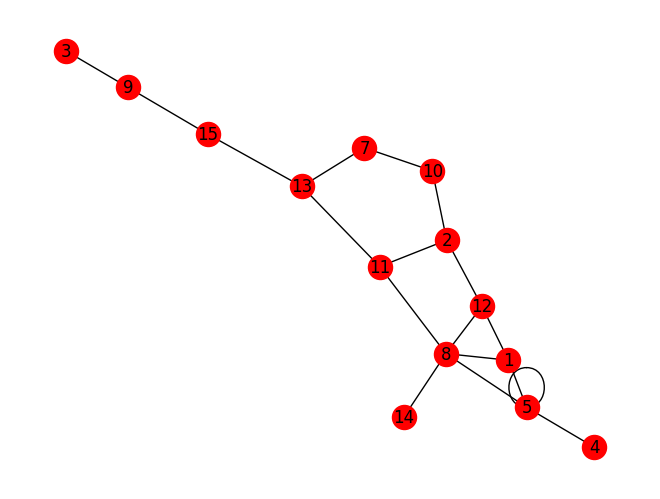

In [144]:
G = nx.Graph()

G.add_edges_from(data)
nx.draw(G, with_labels=True, node_color = 'r')

What are the total number of clusters in the above graph?

### Edge betweeness

It says for every pair of nodes in the network, how many of those pairs have the shortest path between those nodes that have to pass through a given edge.

In [145]:
total_pairs = (30*29)/2 
total_pairs

435.0

In [146]:
nx.edge_betweenness_centrality(G)

{(5, 5): 0.0,
 (5, 1): 0.047619047619047616,
 (5, 8): 0.21611721611721615,
 (5, 4): 0.14285714285714288,
 (7, 13): 0.14835164835164835,
 (7, 10): 0.08241758241758243,
 (13, 15): 0.3626373626373627,
 (13, 11): 0.4120879120879121,
 (15, 9): 0.26373626373626374,
 (1, 8): 0.08241758241758243,
 (1, 12): 0.0641025641025641,
 (8, 11): 0.38827838827838823,
 (8, 14): 0.14285714285714288,
 (8, 12): 0.09706959706959706,
 (2, 12): 0.13919413919413917,
 (2, 11): 0.13003663003663005,
 (2, 10): 0.11538461538461539,
 (3, 9): 0.14285714285714288}

In [147]:
sorted(nx.edge_betweenness_centrality(G).items(), key = lambda pair: -pair[1])

[((13, 11), 0.4120879120879121),
 ((8, 11), 0.38827838827838823),
 ((13, 15), 0.3626373626373627),
 ((15, 9), 0.26373626373626374),
 ((5, 8), 0.21611721611721615),
 ((7, 13), 0.14835164835164835),
 ((5, 4), 0.14285714285714288),
 ((8, 14), 0.14285714285714288),
 ((3, 9), 0.14285714285714288),
 ((2, 12), 0.13919413919413917),
 ((2, 11), 0.13003663003663005),
 ((2, 10), 0.11538461538461539),
 ((8, 12), 0.09706959706959706),
 ((7, 10), 0.08241758241758243),
 ((1, 8), 0.08241758241758243),
 ((1, 12), 0.0641025641025641),
 ((5, 1), 0.047619047619047616),
 ((5, 5), 0.0)]

In [148]:
# The metric for sorting is the second element of each pair
# The second element of each pair is the edge betweenness
# The negative sign is for descending order
# The first [0] stands for the retrieving the first element
# The second [0] stands for the label of the edge, i.e., the first element of the first pair 

sorted(nx.edge_betweenness_centrality(G).items(), key = lambda pair: -pair[1])[0][0]

(13, 11)

If an edge has very high edge betweenness, it means that it is very often on the shortest path between some cluster of nodes and the rest of the network.

Edges that hold communities together have the highest edge betweenness.

In [149]:
num_iter = 4

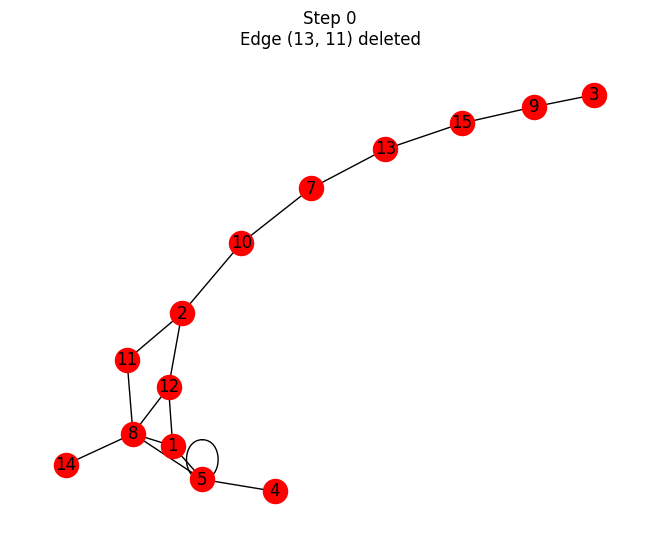

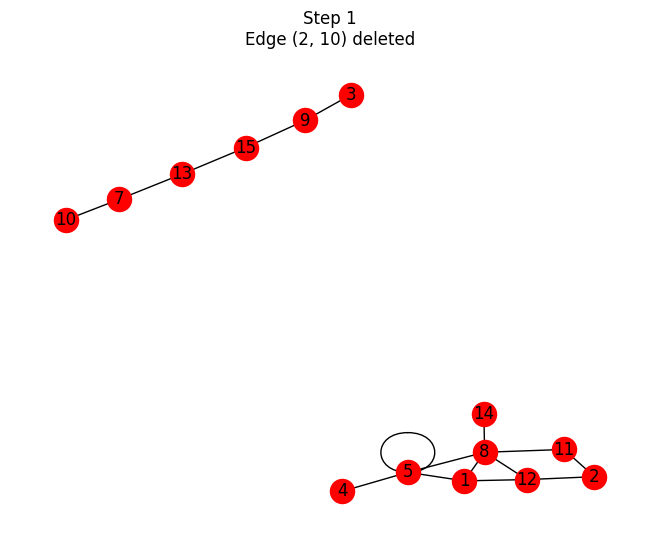

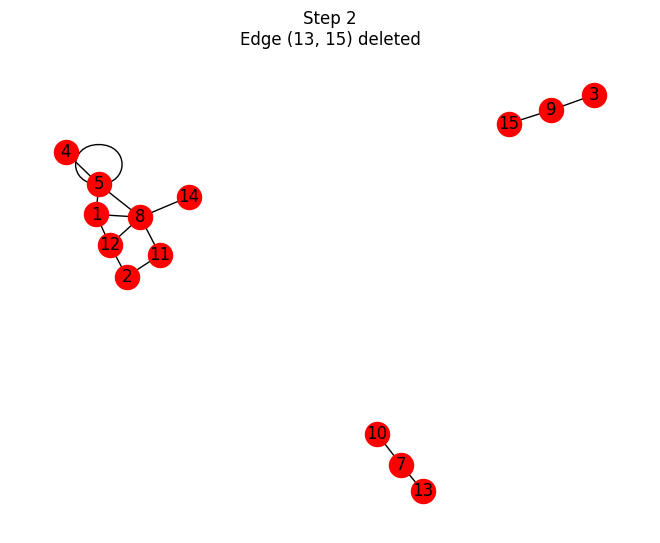

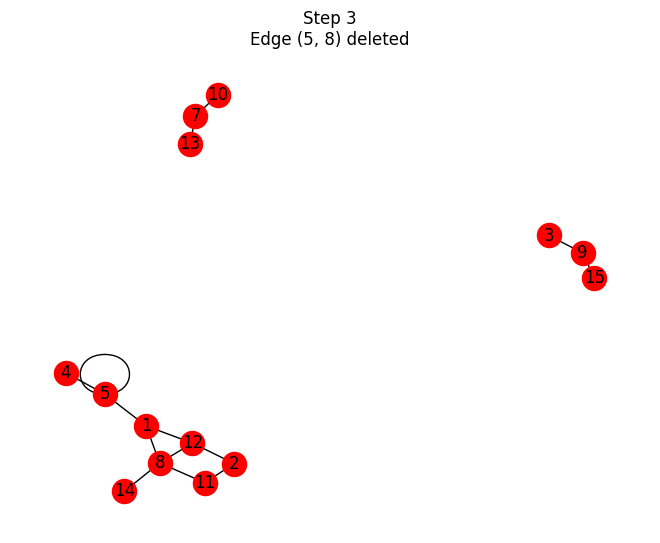

In [150]:
for i in range(num_iter):
  edge_betweenness = nx.edge_betweenness_centrality(G)
  edge_to_delete = sorted(nx.edge_betweenness_centrality(G).items(), key = lambda pair: -pair[1])[0][0]

  G.remove_edge(*edge_to_delete)

  nx.draw(G, with_labels=True, node_color = 'r')
  plt.title('Step %s\nEdge %s deleted'%(i,edge_to_delete))

  plt.show()